In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
path = "/home/lucid/work/forecasting/data/dataset.csv"
data = pd.read_csv(path, delimiter = ';')
del data['#']
data.head()

,H1,H2,H3,H4,H5,H6,H7,M1,M2,M3,M4,M5,M6,L1,L2,L3,L4,L5,L6,L7
0,1,2,3,5,9,11,13,14,24,27,32,45,47,58,60,64,65,67,69,70
1,2,4,5,7,11,12,22,23,27,28,31,41,44,46,48,53,54,62,66,70
2,3,5,9,16,21,24,28,33,36,37,39,42,43,44,46,53,57,60,65,70
3,5,7,10,17,26,28,32,33,35,36,39,42,44,46,49,52,57,58,60,68
4,3,7,8,9,11,12,18,22,26,29,30,33,40,46,48,49,55,58,60,63


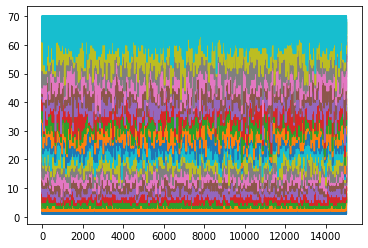

In [3]:
plt.plot(data)

In [4]:
data.isnull().sum()

H1    0
H2    0
H3    0
H4    0
H5    0
H6    0
H7    0
M1    0
M2    0
M3    0
M4    0
M5    0
M6    0
L1    0
L2    0
L3    0
L4    0
L5    0
L6    0
L7    0
dtype: int64

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
df = np.asarray(data[['H1', 'H2']])
granger_test = sm.tsa.stattools.grangercausalitytests(df, maxlag=3, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0095  , p=0.9225  , df_denom=15025, df_num=1
ssr based chi2 test:   chi2=0.0095  , p=0.9225  , df=1
likelihood ratio test: chi2=0.0095  , p=0.9225  , df=1
parameter F test:         F=0.0095  , p=0.9225  , df_denom=15025, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1174  , p=0.8892  , df_denom=15022, df_num=2
ssr based chi2 test:   chi2=0.2350  , p=0.8892  , df=2
likelihood ratio test: chi2=0.2350  , p=0.8892  , df=2
parameter F test:         F=0.1174  , p=0.8892  , df_denom=15022, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0904  , p=0.9654  , df_denom=15019, df_num=3
ssr based chi2 test:   chi2=0.2712  , p=0.9653  , df=3
likelihood ratio test: chi2=0.2712  , p=0.9653  , df=3
parameter F test:         F=0.0904  , p=0.9654  , df_denom=15019, df_num=3


{1: ({'ssr_ftest': (0.009471980248559568, 0.9224703167310093, 15025.0, 1),
   'ssr_chi2test': (0.009473871492535988, 0.9224613031973765, 1),
   'lrtest': (0.009473868514760397, 0.922461315344714, 1),
   'params_ftest': (0.009471980250888964, 0.922470316724204, 15025.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.1174399695930887, 0.8891947052020909, 15022.0, 2),
   'ssr_chi2test': (0.2349581178372179, 0.8891591315052308, 2),
   'lrtest': (0.23495628098316956, 0.8891599481333811, 2),
   'params_ftest': (0.11743996959426538, 0.8891947051998664, 15022.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.09036660599569696, 0.9653677170573797, 15019.0, 3),
   'ssr_chi2test': (0.2712261711880969, 0.9653459894862272, 3),
   'lrtest': (0.27122372334997635, 0.965346433566854, 3),
   'params_ftest': (0.09036660599617086, 0.9653677170570774, 15019.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 

In [6]:
len(data)

15029

In [7]:
#splitting into training and test sets
df1 = data.iloc[:7514]
df2 = data.iloc[7515:]
df1.head()
nobs=7514

In [8]:
#Augmented Dickey-Fuller Test
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df1["H1"])
adf_test(df1["H2"])
adf_test(df1["H3"])
adf_test(df1["H4"])
adf_test(df1["H5"])
adf_test(df1["H6"])
adf_test(df1["H7"])
adf_test(df1["M1"])
adf_test(df1["M2"])
adf_test(df1["M3"])
adf_test(df1["M4"])
adf_test(df1["M5"])
adf_test(df1["M6"])
adf_test(df1["L1"])
adf_test(df1["L2"])
adf_test(df1["L3"])
adf_test(df1["L4"])
adf_test(df1["L5"])
adf_test(df1["L6"])
adf_test(df1["L7"])

 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary
 Series is Stationary


In [9]:
# model fitting
model = VAR(df1)
x = model.select_order(maxlags=12)
x.summary()
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 20, Jul, 2020
Time:                     23:06:56
--------------------------------------------------------------------
No. of Equations:         20.0000    BIC:                    38.0441
Nobs:                     7513.00    HQIC:                   37.7899
Log likelihood:          -354248.    FPE:                2.26060e+16
AIC:                      37.6570    Det(Omega_mle):     2.13786e+16
--------------------------------------------------------------------
Results for equation H1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         2.583396         0.775133            3.333           0.001
L1.H1         0.009463         0.016049            0.590           0.555
L1.H2        -0.012729         0.016170           -0.787           0.431
L1.H3         0.003798

In [10]:
from statsmodels.stats.stattools import durbin_watson
def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df1.columns, out):
    print(adjust(col), ':', round(val, 2))

H1     : 2.0
H2     : 2.0
H3     : 2.0
H4     : 2.0
H5     : 2.0
H6     : 2.0
H7     : 2.0
M1     : 2.0
M2     : 2.0
M3     : 2.0
M4     : 2.0
M5     : 2.0
M6     : 2.0
L1     : 2.0
L2     : 2.0
L3     : 2.0
L4     : 2.0
L5     : 2.0
L6     : 2.0
L7     : 2.0


In [11]:
lag_order = model_fitted.k_ar
print(lag_order) 

1


In [12]:
# plotting
forecast_input = df1.values[-lag_order:]
forecast_input

array([[ 5,  9, 20, 21, 22, 23, 25, 27, 31, 35, 36, 37, 42, 48, 50, 54,
        56, 58, 62, 67]])

In [13]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df1.index[-nobs:], columns=df1.columns + '_2d')
df_forecast

,H1_2d,H2_2d,H3_2d,H4_2d,H5_2d,H6_2d,H7_2d,M1_2d,M2_2d,M3_2d,M4_2d,M5_2d,M6_2d,L1_2d,L2_2d,L3_2d,L4_2d,L5_2d,L6_2d,L7_2d
0,3.475921,7.054471,10.518878,13.797877,17.037704,20.322505,23.648319,27.222042,30.651030,33.985985,37.304549,40.675562,44.032462,47.291300,50.670099,53.959566,57.605709,61.018068,64.235124,67.795437
1,3.428667,6.825606,10.203429,13.570360,16.857131,20.215991,23.638638,27.007503,30.377964,33.766048,37.108537,40.513972,43.868644,47.283015,50.652014,53.997746,57.467381,60.871844,64.235169,67.604787
2,3.412712,6.811269,10.186236,13.563867,16.856318,20.217100,23.630269,26.993702,30.366286,33.751088,37.088019,40.493793,43.854343,47.273232,50.641428,53.996443,57.467091,60.863879,64.237888,67.607546
3,3.412244,6.810394,10.184820,13.562379,16.855057,20.216154,23.629028,26.992750,30.365328,33.749719,37.086827,40.493031,43.853484,47.272577,50.640720,53.995659,57.466128,60.862769,64.237141,67.606820
4,3.412228,6.810378,10.184779,13.562366,16.855055,20.216176,23.629057,26.992732,30.365298,33.749702,37.086823,40.493032,43.853482,47.272582,50.640732,53.995678,57.466130,60.862769,64.237150,67.606821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7509,3.412226,6.810375,10.184775,13.562363,16.855053,20.216175,23.629055,26.992729,30.365297,33.749700,37.086819,40.493029,43.853480,47.272581,50.640729,53.995677,57.466128,60.862768,64.237150,67.606820
7510,3.412226,6.810375,10.184775,13.562363,16.855053,20.216175,23.629055,26.992729,30.365297,33.749700,37.086819,40.493029,43.853480,47.272581,50.640729,53.995677,57.466128,60.862768,64.237150,67.606820
7511,3.412226,6.810375,10.184775,13.562363,16.855053,20.216175,23.629055,26.992729,30.365297,33.749700,37.086819,40.493029,43.853480,47.272581,50.640729,53.995677,57.466128,60.862768,64.237150,67.606820
7512,3.412226,6.810375,10.184775,13.562363,16.855053,20.216175,23.629055,26.992729,30.365297,33.749700,37.086819,40.493029,43.853480,47.272581,50.640729,53.995677,57.466128,60.862768,64.237150,67.606820


In [20]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: H1')
accuracy_prod = forecast_accuracy(df_forecast['H1_2d'].values, df2['H1'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: H2')
accuracy_prod = forecast_accuracy(df_forecast['H2_2d'].values, df2['H2'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: H3')
accuracy_prod = forecast_accuracy(df_forecast['H3_2d'].values, df2['H3'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: H1
mape   :  0.9803
me     :  0.018
mae    :  2.0386
mpe    :  0.7071
rmse   :  2.697
corr   :  0.0044
minmax :  0.4379

Forecast Accuracy of: H2
mape   :  0.5961
me     :  0.0565
mae    :  2.8943
mpe    :  0.3597
rmse   :  3.6914
corr   :  0.0179
minmax :  0.3348
